# Merge, Join, Concatenate | Data Analysis with Python.

In [ ]:
import pandas as pd

In [ ]:
# Creating DataFrame
df_1 = pd.DataFrame({
    "Student_id": [1, 2, 3, 4, 5],
    "Names": ['Joy', 'Paul', 'Andrew', 'Musa', 'Sandra'],
    "Courses": ['English', 'Mathematics', 'Geography', 'Agriculture', 'Philosophy']
})

df_2 = pd.DataFrame({
    "Student_id": [1, 2, 3, 4, 5],
    "Names": ['Joy', 'Debra', 'Joyce', 'Musa', 'Sandra'],
    "Age": [18, 19, 20, 22, 30]
})

In [ ]:
df_1

,Student_id,Names,Courses
0,1,Joy,English
1,2,Paul,Mathematics
2,3,Andrew,Geography
3,4,Musa,Agriculture
4,5,Sandra,Philosophy


In [ ]:
df_2

,Student_id,Names,Age
0,1,Joy,18
1,2,Debra,19
2,3,Joyce,20
3,4,Musa,22
4,5,Sandra,30


In [ ]:
# Inner Merge
# Based on common values in selected column names of both df
df_3 = pd.merge(df_1, df_2, on='Names', how='inner')
df_3

,Student_id_x,Names,Courses,Student_id_y,Age
0,1,Joy,English,1,18
1,4,Musa,Agriculture,4,22
2,5,Sandra,Philosophy,5,30


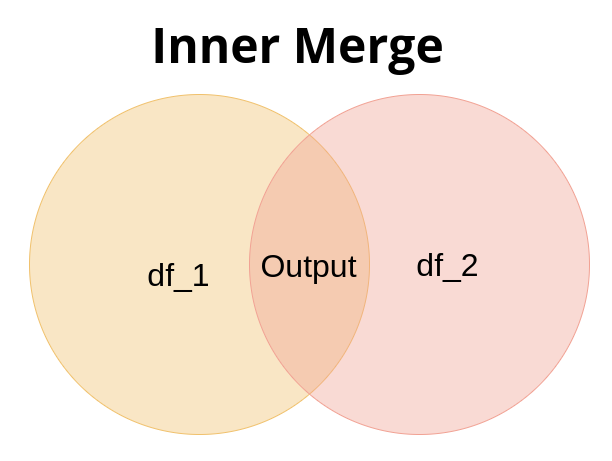

In [ ]:
# Left Merge
# Based on similar values of first df. Takes only similar values
df_left = pd.merge(df_1, df_2, on='Names', how='left')
df_left

,Student_id_x,Names,Courses,Student_id_y,Age
0,1,Joy,English,1.0,18.0
1,2,Paul,Mathematics,NaN,NaN
2,3,Andrew,Geography,NaN,NaN
3,4,Musa,Agriculture,4.0,22.0
4,5,Sandra,Philosophy,5.0,30.0


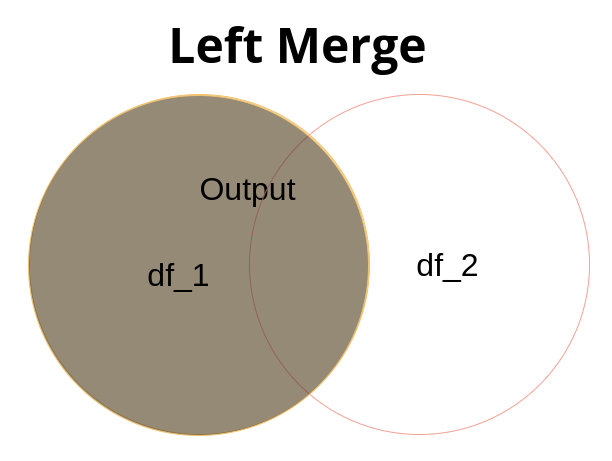

In [ ]:
# Right Merge
# Based on similar values of second df. Takes only similar values
df_right = pd.merge(df_1, df_2, on='Names', how='right')
df_right

,Student_id_x,Names,Courses,Student_id_y,Age
0,1.0,Joy,English,1,18
1,NaN,Debra,NaN,2,19
2,NaN,Joyce,NaN,3,20
3,4.0,Musa,Agriculture,4,22
4,5.0,Sandra,Philosophy,5,30


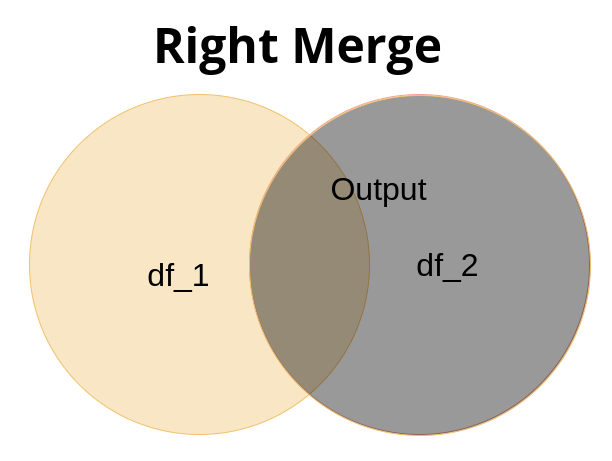

In [ ]:
# Outer Merge
# Based on similarity on both df
df_outer = pd.merge(df_1, df_2, on='Names', how='outer')
df_outer

,Student_id_x,Names,Courses,Student_id_y,Age
0,1.0,Joy,English,1.0,18.0
1,2.0,Paul,Mathematics,NaN,NaN
2,3.0,Andrew,Geography,NaN,NaN
3,4.0,Musa,Agriculture,4.0,22.0
4,5.0,Sandra,Philosophy,5.0,30.0
5,NaN,Debra,NaN,2.0,19.0
6,NaN,Joyce,NaN,3.0,20.0


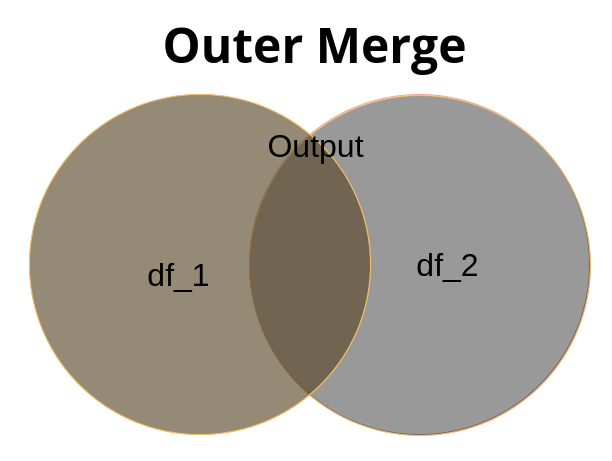

### Join

Similar to merging but based on Index.

In [ ]:
data_1 = pd.DataFrame({
    'Name': ['Jerry', 'Mary', 'Ruth'],
    'Weight': [300, 200, 400]
}, index=[1, 4, 5])

data_2 = pd.DataFrame({
    'Name': ['Jerry', 'Mary', 'Ruth'],
    'State': ['Lagos', 'Abuja', 'Jos'],
    'Weight': [300, 200, 400]
}, index=[1, 2, 3])

In [ ]:
data_1

,Name,Weight
1,Jerry,300
4,Mary,200
5,Ruth,400


In [ ]:
data_2

,Name,State,Weight
1,Jerry,Lagos,300
2,Mary,Abuja,200
3,Ruth,Jos,400


In [ ]:
print(data_1.columns.intersection(data_2.columns))

Index(['Name', 'Weight'], dtype='object')


In [ ]:
# Inner Join
# Uses the only similarities in both df index
data_3 = data_1.join(data_2, lsuffix='_left', rsuffix='_right', how='inner')
data_3

,Name_left,Weight_left,Name_right,State,Weight_right
1,Jerry,300,Jerry,Lagos,300


In [ ]:
# Left Join
# Uses first df as key
data_4 = data_1.join(data_2, lsuffix='_left', rsuffix='_right', how='left')
data_4

,Name_left,Weight_left,Name_right,State,Weight_right
1,Jerry,300,Jerry,Lagos,300.0
4,Mary,200,NaN,NaN,NaN
5,Ruth,400,NaN,NaN,NaN


In [ ]:
# Right Join
# Uses first df as key
data_4 = data_1.join(data_2, lsuffix='_left', rsuffix='_right', how='right')
data_4

,Name_left,Weight_left,Name_right,State,Weight_right
1,Jerry,300.0,Jerry,Lagos,300
2,NaN,NaN,Mary,Abuja,200
3,NaN,NaN,Ruth,Jos,400


In [ ]:
# Outer Join
# Uses entire df as key
data_4 = data_1.join(data_2, lsuffix='_left', rsuffix='_right', how='outer')
data_4

,Name_left,Weight_left,Name_right,State,Weight_right
1,Jerry,300.0,Jerry,Lagos,300.0
2,NaN,NaN,Mary,Abuja,200.0
3,NaN,NaN,Ruth,Jos,400.0
4,Mary,200.0,NaN,NaN,NaN
5,Ruth,400.0,NaN,NaN,NaN


### Concatenate

In [ ]:
data_1 = pd.DataFrame({
    'Name': ['Jerry', 'Mary', 'Ruth'],
    'Weight': [300, 200, 400]
})

data_2 = pd.DataFrame({
    'Name': ['Jerry', 'Mary', 'Ruth'],
    'State': ['Lagos', 'Abuja', 'Jos'],
    'Weight': [300, 200, 400]
})

In [ ]:
# Vertical concatenation
# Bottom to top
vertical_concat = pd.concat([data_1, data_2])
vertical_concat

,Name,Weight,State
0,Jerry,300,NaN
1,Mary,200,NaN
2,Ruth,400,NaN
0,Jerry,300,Lagos
1,Mary,200,Abuja
2,Ruth,400,Jos


In [ ]:
# Horizontal concatenation
# Side by side
horizontal_concat = pd.concat([data_1, data_2], axis=1) # Across all columns for each row
horizontal_concat

,Name,Weight,Name,State,Weight
0,Jerry,300,Jerry,Lagos,300
1,Mary,200,Mary,Abuja,200
2,Ruth,400,Ruth,Jos,400
